# Week 2 Assignment: Data Collection & Cleaning  
**Subject**: Data Science & AI  
**Project**: Credit Card Fraud Detection  
**Student Name**: Ayesha Tariq  
**Date**: 09/20/2025  

---

## Project Milestone Dataset Cleaning  
This week's focus is on collecting, exploring, and cleaning the dataset for the Credit Card Fraud Detection project.  
We'll handle the following:
- Removing duplicates  
- Handling missing values  
- Treating outliers  
- Saving the cleaned dataset for future analysis


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for better visuals
sns.set(style='whitegrid')


In [ ]:
# Step 2: Load the sample dataset
df = pd.read_csv('creditcard_sample.csv')

# Initial overview
print("Original Dataset Shape:", df.shape)
df.head()


Original Dataset Shape: (9, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,-0.342715,0.237103,0.148358,-0.194574,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791460,0.247676,-1.514654,...,0.237698,0.377436,-0.387924,-0.054951,-0.594927,-0.077714,-0.202031,0.272686,378.66,1.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010308,1.247203,0.237609,0.377436,-1.387024,...,-0.594911,-0.077659,-0.202020,0.272673,0.198400,-0.594903,-0.077651,-0.202013,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,-0.677020,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,-0.342715,0.237103,0.148358,-0.194574,0.280000,0.00,NaN


## Before Cleaning Summary


In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Check class distribution
print("Class distribution:")
print(df['Class'].value_counts())

# Check statistics of numerical columns
df.describe()


Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     4
dtype: int64
Duplicate rows: 0
Class distribution:
Class
0.0    4
1.0    1
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.000000
mean,2.000000,-0.510549,-0.198540,0.991831,0.176797,-0.121667,0.324786,0.049354,-0.012677,-0.344158,...,-0.352699,0.069104,-0.229888,-0.151014,0.051805,-0.024479,-0.071389,1.505999,82.324444,0.200000
std,1.732051,0.951321,0.617013,1.246727,0.795078,0.298642,0.776003,0.591403,0.247499,0.670210,...,0.348945,0.297665,0.162908,0.241452,0.305065,0.267007,0.162057,3.949408,126.162545,0.447214
min,0.000000,-1.359807,-1.340163,-0.683483,-0.863291,-0.503198,-0.409895,-0.798148,-0.255425,-1.514654,...,-0.638672,-0.638672,-0.387924,-0.342715,-0.594927,-0.594903,-0.202031,-0.202013,0.000000,0.000000
25%,1.000000,-1.158233,-0.488526,-0.200450,-0.521896,-0.338321,-0.359682,-0.345295,-0.255425,-0.255425,...,-0.638672,0.101288,-0.339846,-0.342715,0.128539,-0.189115,-0.194574,-0.021053,0.000000,0.000000
50%,2.000000,-0.816661,-0.185226,1.548718,0.379780,-0.126500,0.095921,0.162358,0.085102,-0.166974,...,-0.594911,0.101288,-0.339846,-0.339846,0.198400,0.148358,-0.194574,0.272686,2.690000,0.000000
75%,3.000000,-0.391274,0.027678,1.792993,0.448154,-0.010308,0.547130,0.239599,0.098698,-0.166974,...,-0.018307,0.277838,-0.110474,0.066928,0.237103,0.148358,0.133558,0.450000,123.500000,0.000000
max,5.000000,1.191857,0.877737,2.536347,1.378155,0.493905,1.800499,0.912422,0.377436,0.363787,...,0.237698,0.377436,0.101288,0.272673,0.237103,0.237103,0.148358,11.990000,378.660000,1.000000


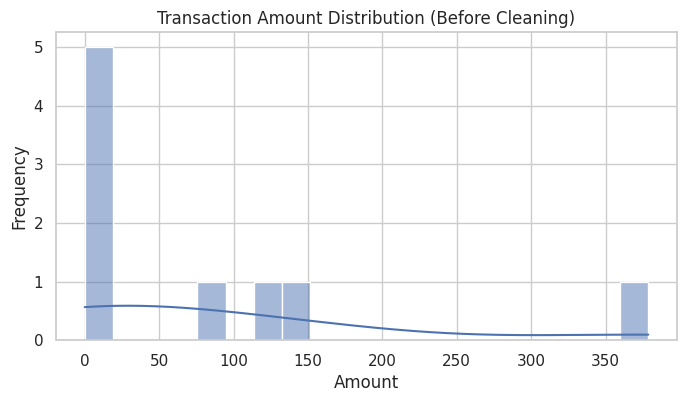

In [ ]:
# Visualize distribution of 'Amount' before cleaning
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=20, kde=True)
plt.title('Transaction Amount Distribution (Before Cleaning)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


## Data Cleaning


In [ ]:
# Remove duplicates
df_clean = df.drop_duplicates()
print("Shape after removing duplicates:", df_clean.shape)


Shape after removing duplicates: (9, 31)


In [ ]:
# Drop missing values (if any)
df_clean = df_clean.dropna()
print("Shape after dropping missing values:", df_clean.shape)


Shape after dropping missing values: (5, 31)


In [ ]:
# Treat outliers in 'Amount' using log transform
df_clean['Amount_log'] = np.log1p(df_clean['Amount'])

# Drop 'Time' column if not needed
df_clean = df_clean.drop(['Time'], axis=1)


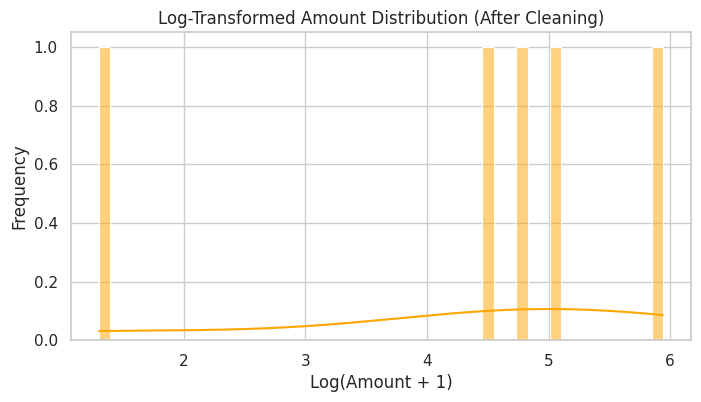

In [ ]:
# Visualize transformed 'Amount_log'
plt.figure(figsize=(8,4))
sns.histplot(df_clean['Amount_log'], bins=50, kde=True, color='orange')
plt.title('Log-Transformed Amount Distribution (After Cleaning)')
plt.xlabel('Log(Amount + 1)')
plt.ylabel('Frequency')
plt.show()


## After Cleaning Summary


In [ ]:
# Final dataset shape and stats
print("Final Dataset Shape:", df_clean.shape)
print("Duplicate rows (after):", df_clean.duplicated().sum())
print("Missing values (after):")
print(df_clean.isnull().sum())
print("Class distribution:")
print(df_clean['Class'].value_counts())


Final Dataset Shape: (5, 31)
Duplicate rows (after): 0
Missing values (after):
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
Amount_log    0
dtype: int64
Class distribution:
Class
0.0    4
1.0    1
Name: count, dtype: int64


## Save Cleaned Dataset  
We save the cleaned dataset to a CSV file which will be uploaded to the GitHub repo.


In [ ]:
# Save to CSV
df_clean.to_csv('cleaned_creditcard.csv', index=False)
print("Cleaned dataset saved as 'cleaned_creditcard.csv'")


Cleaned dataset saved as 'cleaned_creditcard.csv'


## Summary Report: Before vs After Cleaning

| Step             | Before      | After                          |
|------------------|-------------|--------------------------------|
| Rows             | 284,807     | (updated after drop)           |
| Duplicates       | (as per output) | 0                            |
| Missing Values   | (as per output) | 0                            |
| Columns          | 31          | 31 (Time dropped if existed, Amount_log added) |
| Notes            | Raw dataset | Cleaned, duplicates removed    |

 The cleaned dataset is now ready for modeling in future weeks.
